In [2]:
#imports
from statsbombpy import sb
from mplsoccer import Radar, FontManager, grid

import pandas as pd
import numpy as np
import math

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from copy import deepcopy
from ast import literal_eval

In [3]:
#df settings
pd.set_option("display.max_rows", 150)
pd.set_option("display.max_columns", 50)

In [4]:
kane_stats = pd.read_csv('kane_fbref1.csv')
kane_stats
kane_stats.dropna(inplace=True)
kane_stats.drop(columns=['Percentile'],inplace=True)
kane_stats.rename(columns={'Per 90':'Kane'},inplace=True)
kane_stats

,Statistic,Kane
0,Non-Penalty Goals,0.47
1,Non-Penalty xG,0.50
2,Shots Total,3.71
3,Assists,0.24
4,xG Assisted,0.23
5,npxG + xA,0.73
6,Shot-Creating Actions,3.41
8,Passes Attempted,26.98
9,Pass Completion %,69.5%
10,Progressive Passes,3.64


In [5]:
kane_stats2 = pd.read_csv('kane_fbref2.csv')
kane_stats2

,Season,Age,Squad,Country,Comp,LgRank,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
0,2010-2011,17,Leyton Orient,eng ENG,3. League One,7th,10.0,0.50,NaN,1.20,NaN,NaN,1.20,NaN,0.42,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-2012,18,Millwall,eng ENG,2. Championship,16th,17.9,0.39,NaN,1.45,NaN,NaN,1.46,NaN,0.27,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
2,2012-2013,19,Norwich City,eng ENG,1. Premier League,11th,1.5,0.00,NaN,1.33,NaN,NaN,1.33,NaN,0.00,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
3,2012-2013,19,Leicester City,eng ENG,2. Championship,6th,5.9,0.34,NaN,2.03,NaN,NaN,2.02,NaN,0.17,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
4,2012-2013,19,Tottenham,eng ENG,1. Premier League,5th,0.1,0.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
5,2013-2014,20,Tottenham,eng ENG,1. Premier League,6th,5.5,0.55,NaN,2.55,NaN,NaN,2.53,NaN,0.21,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
6,2014-2015,21,Tottenham,eng ENG,1. Premier League,5th,28.7,0.73,NaN,1.64,NaN,NaN,1.64,NaN,0.40,NaN,NaN,0.07,0.10,NaN,NaN,NaN,NaN,NaN,Matches
7,2015-2016,22,Tottenham,eng ENG,1. Premier League,3rd,37.3,0.67,NaN,2.01,NaN,NaN,2.01,NaN,0.27,NaN,NaN,0.13,0.13,NaN,NaN,NaN,NaN,NaN,Matches
8,2016-2017,23,Tottenham,eng ENG,1. Premier League,2nd,28.0,1.04,3.93,2.07,52.7,3.93,2.07,0.22,0.41,NaN,NaN,0.18,0.21,NaN,NaN,NaN,NaN,NaN,Matches
9,2017-2018,24,Tottenham,eng ENG,1. Premier League,3rd,34.2,0.88,5.20,2.11,40.4,5.21,2.11,0.16,0.39,15.8,0.26,0.06,0.09,0.75,0.68,0.13,0.13,0.13,Matches


In [6]:
son_stats = pd.read_csv('son_fbref1.csv')
son_stats
son_stats.dropna(inplace=True)
son_stats.drop(columns=['Percentile'],inplace=True)
son_stats.rename(columns={'Per 90':'Son'},inplace=True)


In [7]:
kane_stats=kane_stats.merge(son_stats, on='Statistic')

In [8]:
kane_stats = kane_stats.head(13)
stats = kane_stats['Statistic']
kane_stats= kane_stats.set_index('Statistic')
kane_stats

,Kane,Son
Statistic,,
Non-Penalty Goals,0.47,0.61
Non-Penalty xG,0.50,0.46
Shots Total,3.71,2.51
Assists,0.24,0.21
xG Assisted,0.23,0.26
npxG + xA,0.73,0.72
Shot-Creating Actions,3.41,3.94
Passes Attempted,26.98,34.78
Pass Completion %,69.5%,75.7%


In [9]:
kane_stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13 entries, Non-Penalty Goals to Touches (Att Pen)
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Kane    13 non-null     object
 1   Son     13 non-null     object
dtypes: object(2)
memory usage: 312.0+ bytes


In [10]:
kane_stats.loc['Pass Completion %','Kane'] = 69.9
kane_stats.loc['Pass Completion %','Son'] = 75.7
kane_stats

,Kane,Son
Statistic,,
Non-Penalty Goals,0.47,0.61
Non-Penalty xG,0.50,0.46
Shots Total,3.71,2.51
Assists,0.24,0.21
xG Assisted,0.23,0.26
npxG + xA,0.73,0.72
Shot-Creating Actions,3.41,3.94
Passes Attempted,26.98,34.78
Pass Completion %,69.9,75.7


In [11]:
kane_stats['Kane'] = kane_stats['Kane'].astype('float')
kane_stats['Son'] = kane_stats['Son'].astype('float')

Kane_vals = kane_stats['Kane']
Son_vals = kane_stats['Son']


In [12]:
#kane_stats.loc[['Shots Total','Shot-Creating Actions','Progressive Passes','Progressive Carries','Dribbles Completed','Touches (Att Pen)'],:]=kane_stats.loc[['Shots Total','Shot-Creating Actions','Progressive Passes','Progressive Carries','Dribbles Completed','Touches (Att Pen)'],:]/10
#kane_stats.loc[['Passes Attempted','Pass Completion %'],:] =  kane_stats.loc[['Passes Attempted','Pass Completion %'],:]/100

In [13]:
#kane_stats

In [14]:
#kane_stats = kane_stats.reindex(stats[::-1])

In [15]:
'''
ax = kane_stats.plot(kind='barh',figsize=(10,12))

plt.title('Comparison of per 90 Stats over the last year',fontsize=18)
plt.xticks([])
plt.yticks(fontsize=12)
plt.ylabel('Per 90 Stats',fontsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
order=[1,0]
plt.legend([handles[i] for i in order], [labels[i] for i in order])
odd=0
for container in ax.containers:
    if odd%2==0:
        ax.bar_label(container, labels=x1[::-1],padding=2.5)
    else:
        ax.bar_label(container, labels =x2[::-1],padding=2.5)
    odd+=1
#plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt1.png')
plt.show()        
'''

"\nax = kane_stats.plot(kind='barh',figsize=(10,12))\n\nplt.title('Comparison of per 90 Stats over the last year',fontsize=18)\nplt.xticks([])\nplt.yticks(fontsize=12)\nplt.ylabel('Per 90 Stats',fontsize=15)\nhandles, labels = plt.gca().get_legend_handles_labels()\norder=[1,0]\nplt.legend([handles[i] for i in order], [labels[i] for i in order])\nodd=0\nfor container in ax.containers:\n    if odd%2==0:\n        ax.bar_label(container, labels=x1[::-1],padding=2.5)\n    else:\n        ax.bar_label(container, labels =x2[::-1],padding=2.5)\n    odd+=1\n#plt.savefig('D:\\Football_data_scientist\\data\\FPL\\Fantasy-Premier-League\\data\\post2_plt1.png')\nplt.show()        \n"

In [16]:
params = list(kane_stats.index)
low =  [0,0.2,0,0,0,0,1,0,0,0,0,0,0]
high = [0.7,0.6,4,0.25,0.25,0.75,4,40,76,4,5.5,1.7,5.5]
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [17]:
radar = Radar(params, low, high,
              lower_is_better=None,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

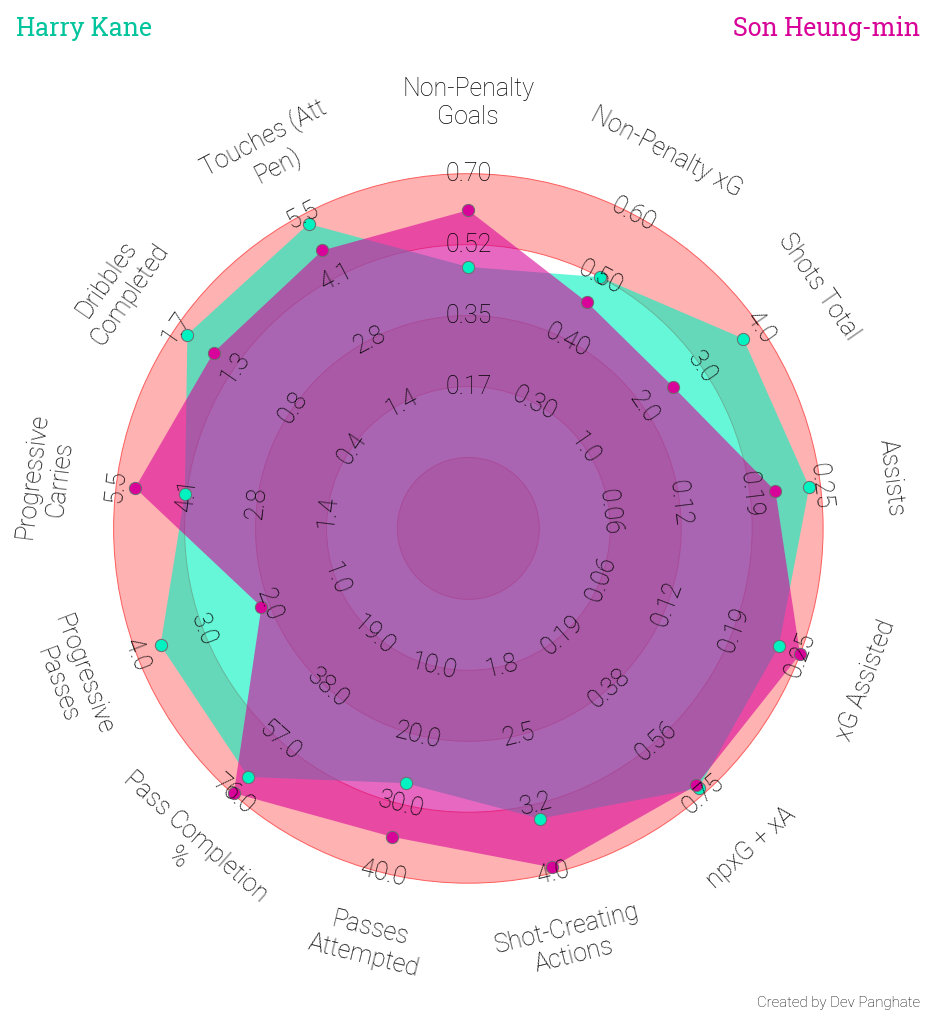

In [18]:
# plot radar
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(Kane_vals, Son_vals, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

endnote_text = axs['endnote'].text(0.99, 0.5, 'Created by Dev Panghate', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Harry Kane', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.99, 0.65, 'Son Heung-min', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')

In [19]:
son_stats2 = pd.read_csv('son_fbref2.csv')
son_stats2

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Standard,Standard.1,Standard.2,Standard.3,Standard.4,Standard.5,Standard.6,Standard.7,Standard.8,Standard.9,Standard.10,Standard.11,Expected,Expected.1,Expected.2,Expected.3,Expected.4,Unnamed: 24
0,Season,Age,Squad,Country,Comp,LgRank,90s,Gls,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches
1,2010-2011,18,Hamburger SV,de GER,1. Bundesliga,8th,8.0,0.38,NaN,0.63,NaN,NaN,0.62,NaN,0.60,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
2,2011-2012,19,Hamburger SV,de GER,1. Bundesliga,15th,13.6,0.37,NaN,0.81,NaN,NaN,0.81,NaN,0.45,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
3,2012-2013,20,Hamburger SV,de GER,1. Bundesliga,7th,29.9,0.40,NaN,1.27,NaN,NaN,1.27,NaN,0.32,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
4,2013-2014,21,Leverkusen,de GER,1. Bundesliga,4th,26.3,0.38,NaN,1.63,NaN,NaN,1.63,NaN,0.23,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
5,2014-2015,22,Leverkusen,de GER,1. Bundesliga,4th,25.3,0.43,NaN,1.03,NaN,NaN,1.03,NaN,0.42,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
6,2015-2016,23,Leverkusen,de GER,1. Bundesliga,3rd,0.7,0.00,NaN,0.00,NaN,NaN,0.00,NaN,NaN,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
7,2015-2016,23,Tottenham,eng ENG,1. Premier League,3rd,12.3,0.33,NaN,1.06,NaN,NaN,1.06,NaN,0.31,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
8,2016-2017,24,Tottenham,eng ENG,1. Premier League,2nd,22.9,0.61,3.49,1.44,41.3,3.49,1.44,0.18,0.42,NaN,NaN,0.00,0.00,NaN,NaN,NaN,NaN,NaN,Matches
9,2017-2018,25,Tottenham,eng ENG,1. Premier League,3rd,25.7,0.47,2.88,1.32,45.9,2.87,1.32,0.16,0.35,16.0,0.00,0.00,0.00,0.40,0.40,0.14,0.06,0.06,Matches


In [20]:
kane_fpl = pd.read_csv('kane_data.csv')
kane_fpl.sort_values(by = 'kickoff_time',inplace=True)
kane_fpl

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,66,2016-17,Harry Kane,FWD,Spurs,0,0,5,0,15.3,403,3,1,0,1.9,0.0,2016-08-13T14:00:00Z,90,6,Everton,0,0,0,0,1,0,618838,1.0,1.0,4.0,2,0,0,0,110,False,0,1
11,2340,2016-17,Harry Kane,FWD,Spurs,1,0,19,1,23.8,403,16,0,0,8.7,21.8,2016-08-20T14:00:00Z,89,5,Crystal Palace,0,0,0,0,2,0,629934,0.0,1.0,41.0,5,-32117,13110,45227,110,True,0,2
21,4549,2016-17,Harry Kane,FWD,Spurs,0,0,2,0,10.6,403,27,1,0,1.9,2.0,2016-08-27T11:30:00Z,82,9,Liverpool,0,0,0,0,3,0,516298,1.0,1.0,6.0,2,-124703,6334,131037,109,True,0,3
32,6975,2016-17,Harry Kane,FWD,Spurs,0,0,28,1,5.8,403,37,0,1,9.8,42.0,2016-09-10T14:00:00Z,72,14,Stoke,0,0,0,0,4,0,534669,4.0,0.0,50.0,6,8509,81771,73262,109,False,0,4
33,7177,2016-17,Harry Kane,FWD,Spurs,0,3,38,1,52.8,403,49,0,1,21.8,56.4,2016-09-18T15:30:00Z,86,15,Sunderland,0,0,0,0,5,0,560764,0.0,1.0,109.0,9,20666,45347,24681,109,True,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2814,2022-23,Harry Kane,FWD,Spurs,1,0,14,0,7.3,427,47,1,0,7.8,6.0,2022-08-31T18:45:00Z,90,19,West Ham,0,0,0,0,5,0,1775930,1.0,1.0,65.0,5,20503,177547,157044,114,False,0,5
232,3435,2022-23,Harry Kane,FWD,Spurs,0,3,37,1,32.6,427,59,0,1,14.3,46.0,2022-09-03T14:00:00Z,77,9,Fulham,0,0,0,0,6,0,1679744,1.0,2.0,64.0,9,-127277,123599,250876,114,True,0,6
233,3926,2022-23,Harry Kane,FWD,Spurs,1,1,38,0,32.3,427,79,2,1,14.7,57.8,2022-09-17T16:30:00Z,90,10,Leicester,0,0,0,0,8,0,2134886,2.0,6.0,57.0,10,238532,314312,75780,114,True,0,8
234,4019,2022-23,Harry Kane,FWD,Spurs,0,0,26,0,1.2,427,81,3,1,7.9,36.2,2022-10-01T11:30:00Z,90,1,Arsenal,0,0,0,0,9,0,2011573,1.0,3.0,42.0,6,29341,155072,125731,114,False,0,9


In [21]:
seasons = list(kane_fpl['season_x'].unique())
seasons

['2016-17', '2017-18', '2018-19', '2019-20', '2020-21', '2021-22', '2022-23']

In [22]:
son_fpl = pd.read_csv('son_data.csv')
son_fpl.sort_values(by = 'kickoff_time',inplace=True)
son_fpl

,Unnamed: 0,season_x,name,position,team_x,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,influence,kickoff_time,minutes,opponent_team,opp_team_name,own_goals,penalties_missed,penalties_saved,red_cards,round,saves,selected,team_a_score,team_h_score,threat,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,GW
0,69,2016-17,Heung-Min Son,MID,Spurs,0,0,0,0,0.0,402,3,0,0,0.0,0.0,2016-08-13T14:00:00Z,0,6,Everton,0,0,0,0,1,0,1534,1.0,1.0,0.0,0,0,0,0,75,False,0,1
11,2343,2016-17,Heung-Min Son,MID,Spurs,0,0,0,0,0.0,402,16,0,0,0.0,0.0,2016-08-20T14:00:00Z,0,5,Crystal Palace,0,0,0,0,2,0,1442,0.0,1.0,0.0,0,-277,23,300,75,True,0,2
21,4552,2016-17,Heung-Min Son,MID,Spurs,0,0,0,0,0.0,402,27,0,0,0.0,0.0,2016-08-27T11:30:00Z,0,9,Liverpool,0,0,0,0,3,0,1338,1.0,1.0,0.0,0,-199,31,230,74,True,0,3
32,6978,2016-17,Heung-Min Son,MID,Spurs,1,3,58,1,40.2,402,37,0,2,17.8,89.8,2016-09-10T14:00:00Z,90,14,Stoke,0,0,0,0,4,0,1294,4.0,0.0,48.0,19,-118,29,147,74,False,0,4
33,7180,2016-17,Heung-Min Son,MID,Spurs,0,0,11,1,84.4,402,49,0,0,18.4,18.4,2016-09-18T15:30:00Z,90,15,Sunderland,0,0,0,0,5,0,25194,0.0,1.0,81.0,3,21282,23815,2533,74,True,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2569,2022-23,Heung-Min Son,MID,Spurs,0,0,2,0,1.8,428,47,1,0,4.0,0.6,2022-08-31T18:45:00Z,90,19,West Ham,0,0,0,0,5,0,1156313,1.0,1.0,38.0,2,-317771,19806,337577,118,False,0,5
232,3181,2022-23,Heung-Min Son,MID,Spurs,0,0,10,0,62.6,428,59,1,0,13.6,16.6,2022-09-03T14:00:00Z,83,9,Fulham,0,0,0,0,6,0,961990,1.0,2.0,57.0,2,-214168,23843,238011,117,True,0,6
233,3735,2022-23,Heung-Min Son,MID,Spurs,0,3,55,0,0.4,428,79,0,3,14.3,104.4,2022-09-17T16:30:00Z,31,10,Leicester,0,0,0,0,8,0,1101949,2.0,6.0,38.0,19,148426,210666,62240,117,True,0,8
234,4021,2022-23,Heung-Min Son,MID,Spurs,0,0,9,0,14.9,428,81,3,0,1.9,4.2,2022-10-01T11:30:00Z,71,1,Arsenal,0,0,0,0,9,0,1189387,1.0,3.0,0.0,2,152184,253350,101166,117,False,0,9


In [23]:
kane_1617 = kane_fpl[kane_fpl['season_x']=='2016-17']
kane_1617['GW'] = list(range(1,len(kane_1617)+1))
kane_1617= kane_1617.set_index('GW')
h1 = kane_1617['total_points']

kane_1718 = kane_fpl[kane_fpl['season_x']=='2017-18']
kane_1718['GW'] = list(range(1,len(kane_1718)+1))
kane_1718= kane_1718.set_index('GW')
h2 = kane_1718['total_points']

kane_1819 = kane_fpl[kane_fpl['season_x']=='2018-19']
kane_1819['GW'] = list(range(1,len(kane_1819)+1))
kane_1819= kane_1819.set_index('GW')
h3 = kane_1819['total_points']

kane_1920 = kane_fpl[kane_fpl['season_x']=='2019-20']
kane_1920['GW'] = list(range(1,len(kane_1920)+1))
kane_1920= kane_1920.set_index('GW')
h4 = kane_1920['total_points']

kane_2021 = kane_fpl[kane_fpl['season_x']=='2020-21']
kane_2021['GW'] = list(range(1,len(kane_2021)+1))
kane_2021= kane_2021.set_index('GW')
h5 = kane_2021['total_points']

kane_2122 = kane_fpl[kane_fpl['season_x']=='2021-22']
kane_2122['GW'] = list(range(1,len(kane_2122)+1))
kane_2122= kane_2122.set_index('GW')
h6 = kane_2122['total_points']

kane_2223 = kane_fpl[kane_fpl['season_x']=='2022-23']
kane_2223['GW'] = list(range(1,len(kane_2223)+1))
kane_2223= kane_2223.set_index('GW')
h7 = kane_2223['total_points']



<ipython-input-23-ef6a88b11b29>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kane_1617['GW'] = list(range(1,len(kane_1617)+1))
<ipython-input-23-ef6a88b11b29>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kane_1718['GW'] = list(range(1,len(kane_1718)+1))
<ipython-input-23-ef6a88b11b29>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/p

In [24]:

kane_points = [h1,h2,h3,h4,h5,h6,h7]
for series in  kane_points:
    
    tot=series[1]
    for i in range(2,len(series)+1):
        series[i] = series[i]+tot
        tot = series[i]


<ipython-input-24-ab840f9e0789>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = series[i]+tot


In [25]:
son_1617 = son_fpl[son_fpl['season_x']=='2016-17']
son_1617['GW'] = list(range(1,len(son_1617)+1))
son_1617= son_1617.set_index('GW')
s1 = son_1617['total_points']

son_1718 = son_fpl[son_fpl['season_x']=='2017-18']
son_1718['GW'] = list(range(1,len(son_1718)+1))
son_1718= son_1718.set_index('GW')
s2 = son_1718['total_points']

son_1819 = son_fpl[son_fpl['season_x']=='2018-19']
son_1819['GW'] = list(range(1,len(son_1819)+1))
son_1819= son_1819.set_index('GW')
s3 = son_1819['total_points']

son_1920 = son_fpl[son_fpl['season_x']=='2019-20']
son_1920['GW'] = list(range(1,len(son_1920)+1))
son_1920= son_1920.set_index('GW')
s4 = son_1920['total_points']

son_2021 = son_fpl[son_fpl['season_x']=='2020-21']
son_2021['GW'] = list(range(1,len(son_2021)+1))
son_2021= son_2021.set_index('GW')
s5 = son_2021['total_points']

son_2122 = son_fpl[son_fpl['season_x']=='2021-22']
son_2122['GW'] = list(range(1,len(son_2122)+1))
son_2122= son_2122.set_index('GW')
s6 = son_2122['total_points']

son_2223 = son_fpl[son_fpl['season_x']=='2022-23']
son_2223['GW'] = list(range(1,len(son_2223)+1))
son_2223= son_2223.set_index('GW')
s7 = son_2223['total_points']


<ipython-input-25-47697e2fba8b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_1617['GW'] = list(range(1,len(son_1617)+1))
<ipython-input-25-47697e2fba8b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  son_1718['GW'] = list(range(1,len(son_1718)+1))
<ipython-input-25-47697e2fba8b>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [26]:

son_points = [s1,s2,s3,s4,s5,s6,s7]
for series in  son_points:
    
    tot=series[1]
    for i in range(2,len(series)+1):
        series[i] = series[i]+tot
        tot = series[i]


<ipython-input-26-7c5557f3931c>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  series[i] = series[i]+tot


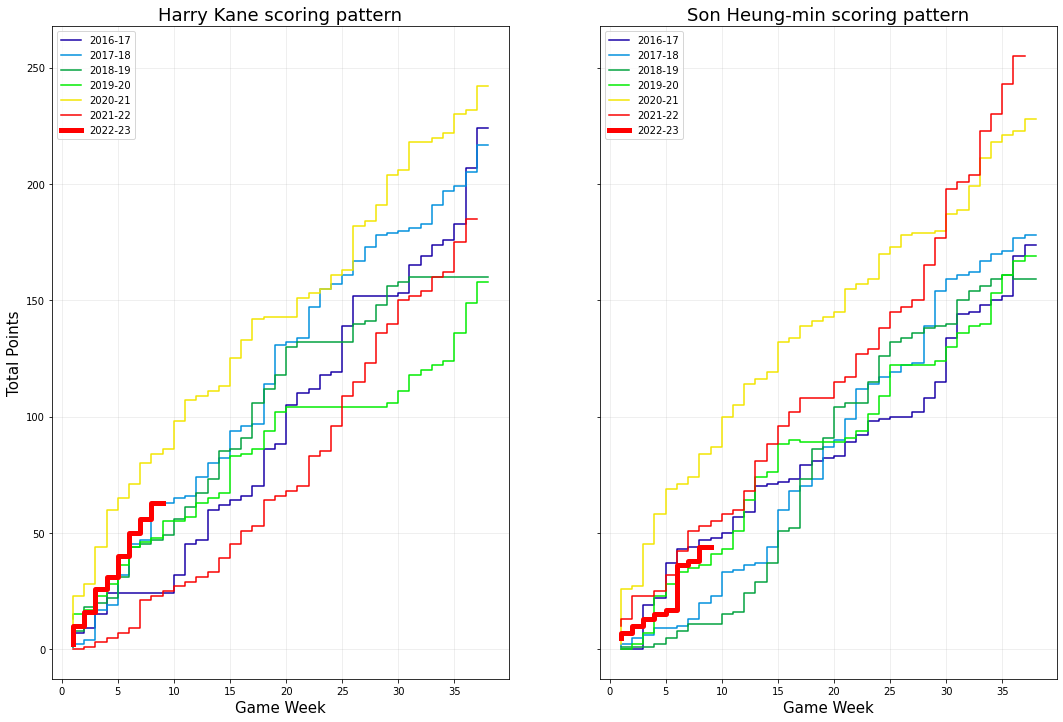

In [28]:
sns.set_palette('nipy_spectral')
fig, ax = plt.subplots(1,2,figsize=(18, 12),sharey=True)


plt.subplot(1, 2, 1)

for series in kane_points[:-1]:
    ax = sns.lineplot(y = series, x= series.index, drawstyle='steps-pre',palette='Reds')
ax = sns.lineplot(y = h7 ,x = h7.index, drawstyle='steps-pre' , linewidth = 5 ,color ='r')
plt.grid(visible=True,axis='both',alpha=0.25)
plt.legend(labels=seasons,loc='upper left')
plt.title('Harry Kane scoring pattern',fontsize=18)
plt.xlabel('Game Week',fontsize=15)
plt.ylabel('Total Points',fontsize=15)


plt.subplot(1, 2, 2)

for series in son_points[:-1]:
    ax = sns.lineplot(y = series, x= series.index, drawstyle='steps-pre',palette='Blues')
ax = sns.lineplot(y = s7 ,x = s7.index, drawstyle='steps-pre' , linewidth = 5 ,color ='r')

# tidy up the figure

plt.grid(visible=True,axis='both',alpha=0.25)
plt.legend(labels=seasons,loc='upper left')
plt.title('Son Heung-min scoring pattern',fontsize=18)
plt.xlabel('Game Week',fontsize=15)
plt.ylabel('Total Points',fontsize=15)


plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt2.png')
plt.show()


In [28]:
gb1 = kane_fpl.groupby(by='season_x').agg({'total_points':'sum','goals_scored':'sum','assists':'sum'})
gb2 = son_fpl.groupby(by='season_x').agg({'total_points':'sum','goals_scored':'sum','assists':'sum'})
gb1.rename(columns={'total_points':'total_points_Kane','goals_scored':'goals_scored_Kane','assists':'assists_Kane'},inplace=True)
gb2.rename(columns={'total_points':'total_points_Son','goals_scored':'goals_scored_Son','assists':'assists_Son'},inplace=True)

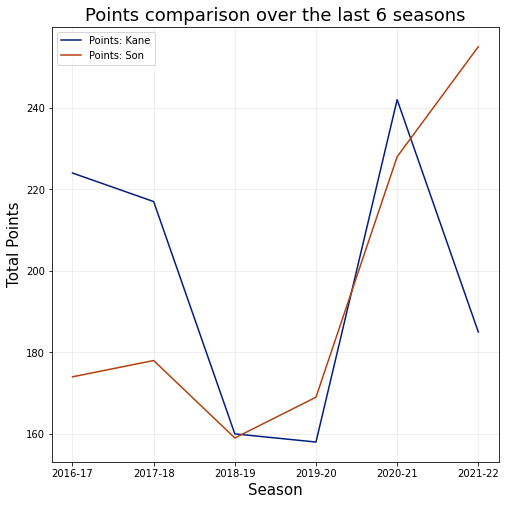

In [29]:
sns.set_palette('dark')
fig = plt.figure(figsize=(8,8))

ax = sns.lineplot(x = seasons[:-1], y = gb1['total_points_Kane'][:-1])

ax = sns.lineplot(x = seasons[:-1], y = gb2['total_points_Son'][:-1])

plt.grid(visible=True,axis='both',alpha=0.25)
plt.legend(labels=['Points: Kane','Points: Son'],loc='upper left')
plt.title('Points comparison over the last 6 seasons',fontsize=18)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Total Points',fontsize=15)

plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt3.png')


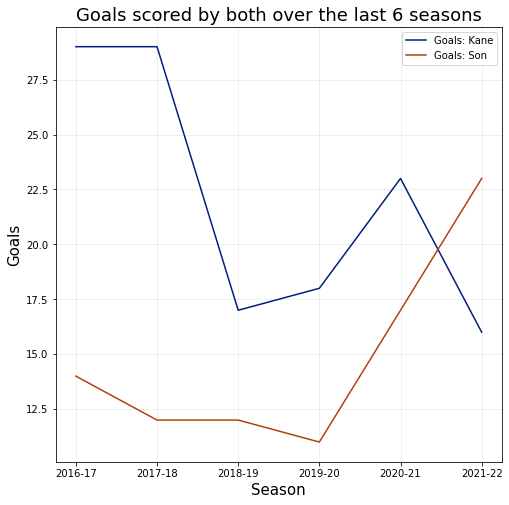

In [30]:

fig = plt.figure(figsize=(8,8))

ax = sns.lineplot(x = seasons[:-1], y = gb1['goals_scored_Kane'][:-1])
ax = sns.lineplot(x = seasons[:-1], y = gb2['goals_scored_Son'][:-1])

plt.grid(visible=True,axis='both',alpha=0.25)
plt.legend(labels=['Goals: Kane','Goals: Son'],loc='upper right')
plt.title('Goals scored by both over the last 6 seasons',fontsize=18)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Goals',fontsize=15)
plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt4.png')


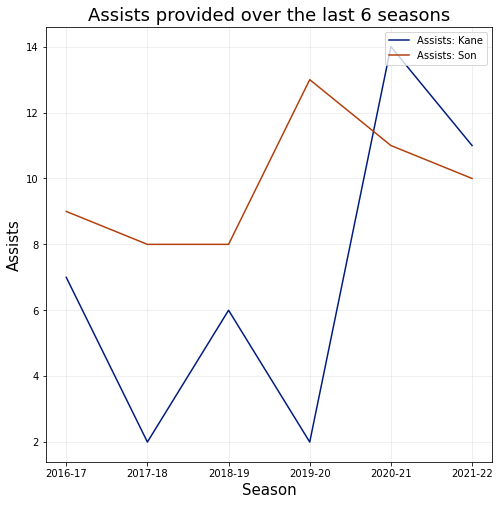

In [31]:
fig = plt.figure(figsize=(8,8))

ax = sns.lineplot(x = seasons[:-1], y = gb1['assists_Kane'][:-1])
ax = sns.lineplot(x = seasons[:-1], y = gb2['assists_Son'][:-1])

plt.grid(visible=True,axis='both',alpha=0.25)
plt.legend(labels=['Assists: Kane','Assists: Son'],loc='upper right')
plt.title('Assists provided over the last 6 seasons',fontsize=18)
plt.xlabel('Season',fontsize=15)
plt.ylabel('Assists',fontsize=15)
plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt5.png')


In [32]:
gb3 = kane_fpl.groupby(by='opp_team_name').agg({'total_points':'mean'})
gb4 = son_fpl.groupby(by='opp_team_name').agg({'total_points':'mean'})

gb3 = gb3.loc[['Everton','Man Utd','Newcastle','Bournemouth','Liverpool','Leeds'],:]
gb4 = gb4.loc[['Everton','Man Utd','Newcastle','Bournemouth','Liverpool','Leeds'],:]

In [33]:
teams = list(gb3.index)
avg_kane = gb3['total_points']
avg_son = gb4['total_points']

df1 = pd.DataFrame({'Kane_avg':avg_kane,'Son_avg':avg_son},index=teams)
df1 = df1.round(2)

In [34]:
teams

['Everton', 'Man Utd', 'Newcastle', 'Bournemouth', 'Liverpool', 'Leeds']

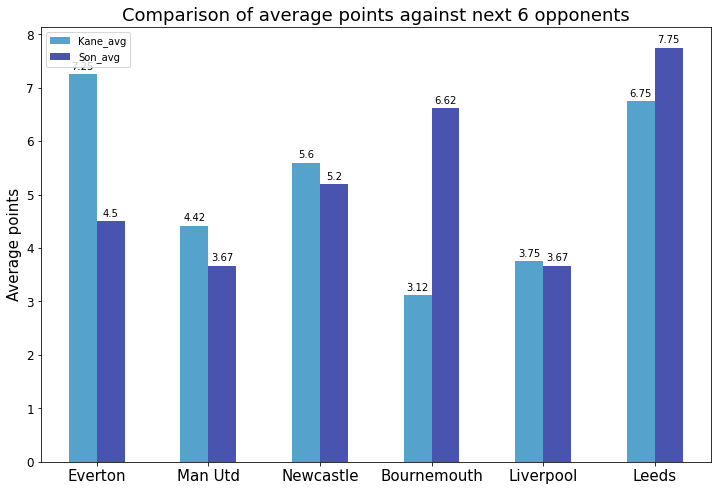

In [35]:
sns.set_palette('icefire')
ax = df1.plot(kind='bar',figsize=(12,8))

plt.title('Comparison of average points against next 6 opponents',fontsize=18)

plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel('Average points',fontsize=15)

plt.legend()
odd=0
for container in ax.containers:
    if odd%2==0:
        ax.bar_label(container, labels=df1['Kane_avg'],padding=2.5)
    else:
        ax.bar_label(container, labels =df1['Son_avg'],padding=2.5)
    odd+=1

plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt6.png')
#plt.show()

In [36]:
Home_Kane = kane_fpl[kane_fpl['was_home']==True]
Away_Kane = kane_fpl[kane_fpl['was_home']==False]
kane_home = Home_Kane.groupby(by='season_x').agg({'total_points':'mean'})
kane_home_opp = Home_Kane.groupby(by='opp_team_name').agg({'total_points':'mean'})


In [37]:
kane_away = Away_Kane.groupby(by='season_x').agg({'total_points':'mean'})
kane_away_opp = Away_Kane.groupby(by='opp_team_name').agg({'total_points':'mean'})

In [38]:
Home_Son = son_fpl[son_fpl['was_home']==True]
Away_Son = son_fpl[son_fpl['was_home']==False]
son_home = Home_Son.groupby(by='season_x').agg({'total_points':'mean'})
son_home_opp = Home_Son.groupby(by='opp_team_name').agg({'total_points':'mean'})

In [39]:
son_away = Away_Son.groupby(by='season_x').agg({'total_points':'mean'})
son_away_opp = Away_Son.groupby(by='opp_team_name').agg({'total_points':'mean'})

In [40]:
son_away_opp.columns


Index(['total_points'], dtype='object')

In [41]:
df2 = pd.DataFrame({'Kane Home':kane_home['total_points'][:-1],'Kane Away':kane_away['total_points'][:-1]},index=seasons[:-1])
df2 = df2.round(2)

In [42]:
df3 = pd.DataFrame({'Son Home':son_home['total_points'][:-1],'Son Away':son_away['total_points'][:-1]},index=seasons[:-1])
df3 = df3.round(2)

In [43]:
df2

,Kane Home,Kane Away
2016-17,6.79,5.00
2017-18,6.21,5.21
2018-19,3.05,5.37
2019-20,4.42,3.89
2020-21,6.05,6.68
2021-22,4.44,5.53


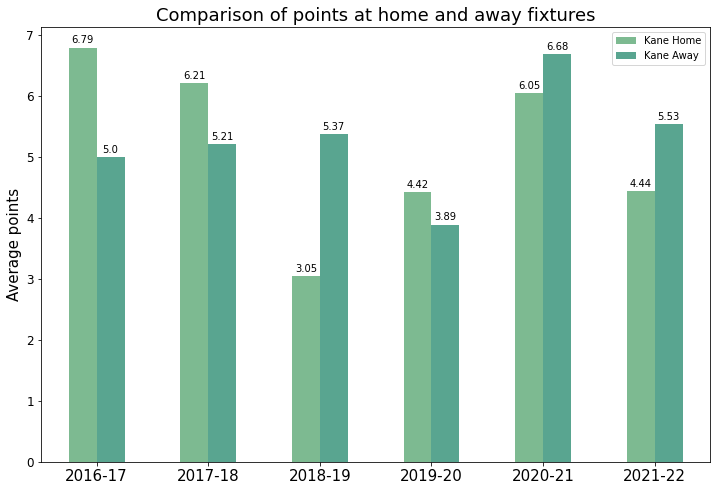

In [44]:
sns.set_palette('crest')
ax = df2.plot(kind='bar',figsize=(12,8))

plt.title('Comparison of points at home and away fixtures',fontsize=18)

plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel('Average points',fontsize=15)

plt.legend()
odd=0
for container in ax.containers:
    if odd%2==0:
        ax.bar_label(container, labels=df2['Kane Home'],padding=2.5)
    else:
        ax.bar_label(container, labels =df2['Kane Away'],padding=2.5)
    
    odd+=1

plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt7.png')
#plt.show()

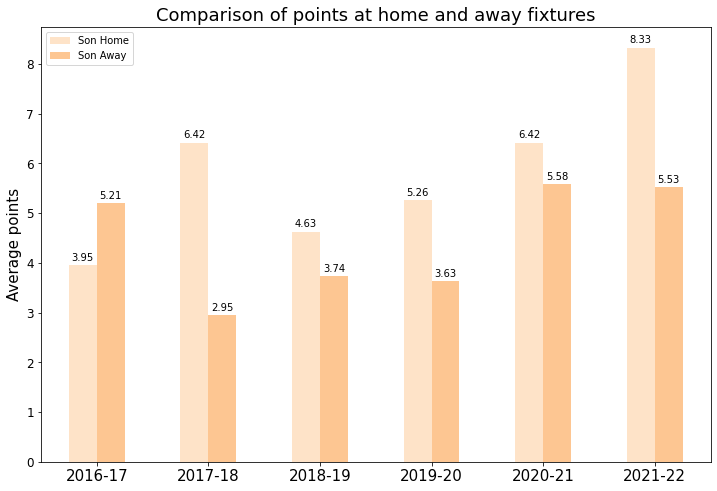

In [45]:
sns.set_palette('Oranges')
ax = df3.plot(kind='bar',figsize=(12,8))

plt.title('Comparison of points at home and away fixtures',fontsize=18)

plt.xticks(rotation=0,fontsize=15)
plt.yticks(fontsize=12)
plt.ylabel('Average points',fontsize=15)

plt.legend()
odd=0
for container in ax.containers:
    if odd%2==0:
        ax.bar_label(container, labels=df3['Son Home'],padding=2.5)
    else:
        ax.bar_label(container, labels =df3['Son Away'],padding=2.5)
    
    odd+=1

plt.savefig('D:\Football_data_scientist\data\FPL\Fantasy-Premier-League\data\post2_plt8.png')
#plt.show()

In [46]:
df4 = pd.DataFrame({'Kane home':kane_home_opp['total_points'],'Kane Away':kane_away_opp['total_points'],'Son Home':son_home_opp['total_points'],'Son Away':son_away_opp['total_points']},index=list(son_away_opp.index))


In [47]:
df4 = df4.loc[['Everton','Man Utd','Newcastle','Bournemouth','Liverpool','Leeds'],:]

In [48]:
df4

,Kane home,Kane Away,Son Home,Son Away
Everton,7.166667,7.333333,4.166667,4.833333
Man Utd,2.833333,6.000000,3.000000,4.333333
Newcastle,3.400000,7.800000,6.400000,4.000000
Bournemouth,5.500000,0.750000,9.000000,4.250000
Liverpool,4.500000,3.000000,3.166667,4.166667
Leeds,7.000000,6.500000,7.500000,8.000000
